<a href="https://colab.research.google.com/github/MaysamCHAARI/Image-Classification-CNN-and-VGG/blob/main/CNN_LSTM_model_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/My Drive/Dataset1', output="output", seed=134, ratio=(.7, 0.2,0.1))

Copying files: 6410 files [02:10, 48.99 files/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_HEIGHT = 128
IMG_WIDTH = 128
#add data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create image datasets from directory with data augmentation

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
#labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
labels="inferred",  # Automatically infer labels from directory structure
label_mode="categorical"
)



Found 4486 files belonging to 4 classes.
Found 1281 files belonging to 4 classes.
Found 643 files belonging to 4 classes.


In [ ]:
import cv2

def check_image_type(image_path):
    image = cv2.imread(image_path)
    if len(image.shape) == 2:
        print("Grayscale image")
    elif image.shape[2] == 3:
        print("RGB image")
    else:
        print("Unknown image type")

# Test the function
check_image_type("/content/drive/My Drive/Dataset1/Mild_Demented/mild_2.jpg")

RGB image


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

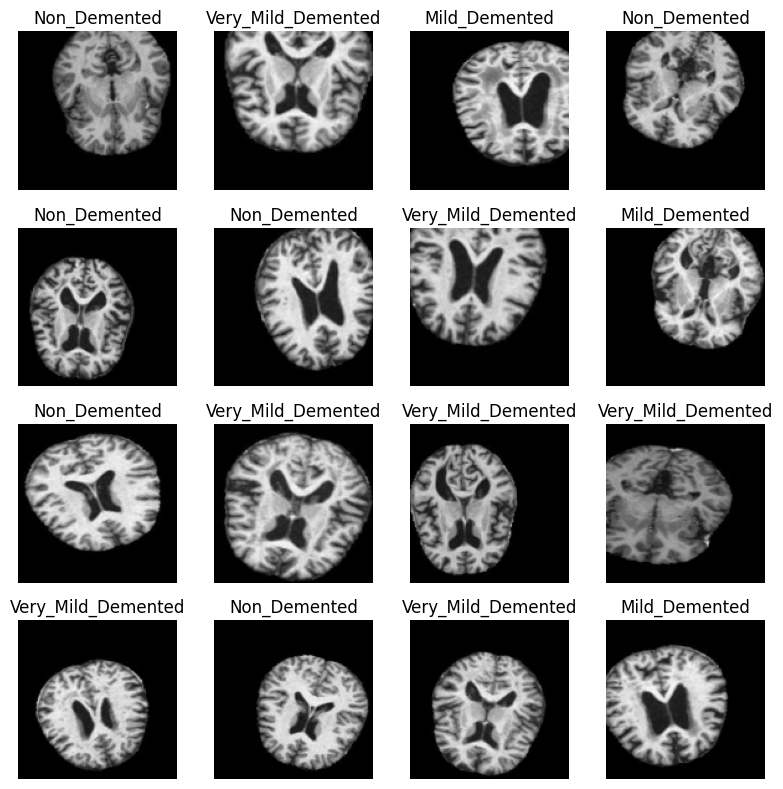

In [ ]:
import matplotlib.pyplot as plt

# Mapping between class indices and class names
class_names = train_ds.class_names  # Assuming train_ds is defined earlier

# Visualize augmented images from the ImageDataGenerator
def visualize_augmented_images(generator, num_images=16, images_per_line=4):
    # Extract images and labels from the dataset
    sample_images, sample_labels = [], []
    for images, labels in train_ds.take(1):  # Take a batch of images and labels from the dataset
        sample_images = images.numpy()
        sample_labels = labels.numpy()
        break

    # Generate augmented images
    augmented_images = [generator.random_transform(image) for image in sample_images[:num_images]]

    # Plot augmented images horizontally with class names
    num_lines = num_images // images_per_line + (1 if num_images % images_per_line != 0 else 0)
    fig, axes = plt.subplots(num_lines, images_per_line, figsize=(8, 8))
    for i, (image, label) in enumerate(zip(augmented_images, sample_labels[:num_images])):
        ax = axes[i // images_per_line, i % images_per_line]
        ax.imshow(image.astype("uint8"))  # Ensure proper data type for visualization
        ax.axis('off')
        ax.set_title(f'{class_names[np.argmax(label)]}')  # Get class name from class indices

    plt.tight_layout()
    plt.show()

# Visualize augmented images from the training data
visualize_augmented_images(datagen)


**texte en gras**

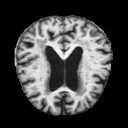

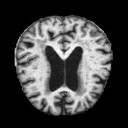

UsageError: Line magic function `%cv2.destroyAllWindows()` not found.


In [ ]:
import cv2




import cv2
from google.colab.patches import cv2_imshow

# Load an RGB image

img = cv2.imread('/content/drive/My Drive/Dataset1/Mild_Demented/mild_2.jpg')

# Convert the RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
cv2_imshow(img)
cv2_imshow(gray)
cv2.waitKey(0)
%cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, LSTM, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall,F1Score
# Confusion Matrix function

# Define the input shape for the LSTM (sequence_length, num_features)
sequence_length = 64   # Adjust this to the length of your sequences
num_features = 3

IMG_HEIGHT, IMG_WIDTH = 128, 128

model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, num_features)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, "relu"))

# Add the LSTM layer
model.add(keras.layers.LSTM(64,  return_sequences=True,
              activation='tanh', recurrent_activation='hard_sigmoid')) # You can adjust the number of units as needed
model.add(keras.layers.LSTM(32))  # You can adjust the number of units as needed

model.add(keras.layers.Dense(4, "softmax"))

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=[
        "accuracy",
        Precision(name='precision'),
        Recall(name='recall'),
         F1Score(average='weighted', name='f1_score')
    ])

# Print a summary of the model architecture
model.summary()
plt.show()

ValueError: Input 0 of layer "lstm_32" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

### LSTM

this is the trainig code now

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 64)      

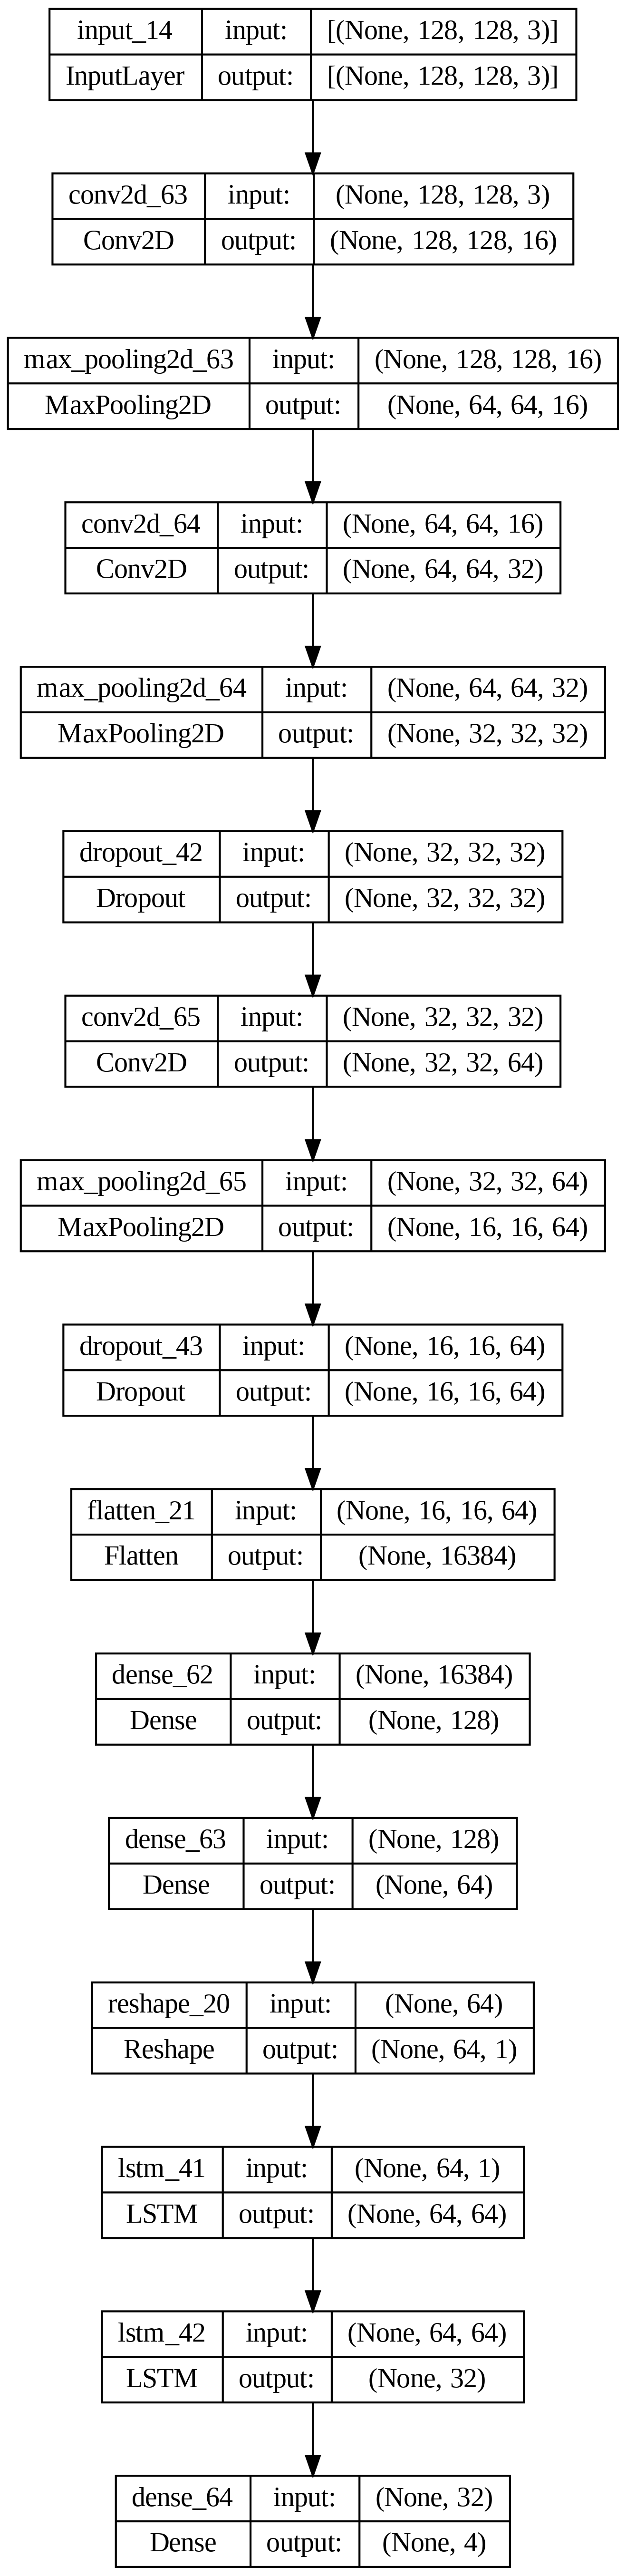

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Flatten, Dropout, Dense, Reshape, Input
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image
# Confusion Matrix function

# Define the input shape for the LSTM (sequence_length, num_features)
sequence_length = 64   # Adjust this to the length of your sequences
num_features = 1

IMG_HEIGHT, IMG_WIDTH = 128, 128

model = keras.models.Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

#model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, "relu"))

model.add(keras.layers.Reshape((sequence_length, num_features)))

# Add the LSTM layer
model.add(keras.layers.LSTM(64,  return_sequences=True,
              activation='tanh', recurrent_activation='hard_sigmoid')) # You can adjust the number of units as needed
model.add(keras.layers.LSTM(32))  # You can adjust the number of units as needed

model.add(keras.layers.Dense(4, "softmax"))

#model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=[
        "accuracy",
        Precision(name='precision'),
        Recall(name='recall'),
         F1Score(average='weighted', name='f1_score')
    ])
# Print a summary of the model architecture
model.summary()
# Plot the model summary table and save it as an image
# Generate the model summary as a .png image
tf.keras.utils.plot_model(
    model,
    to_file='model_summary.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # 'TB' for vertical, 'LR' for horizontal
    expand_nested=False,
    dpi=300  # Adjust the resolution as needed
)

### 2 eme model

# Training

In [ ]:
2 eme model j'ai ajouter dropout la resultat est mieux

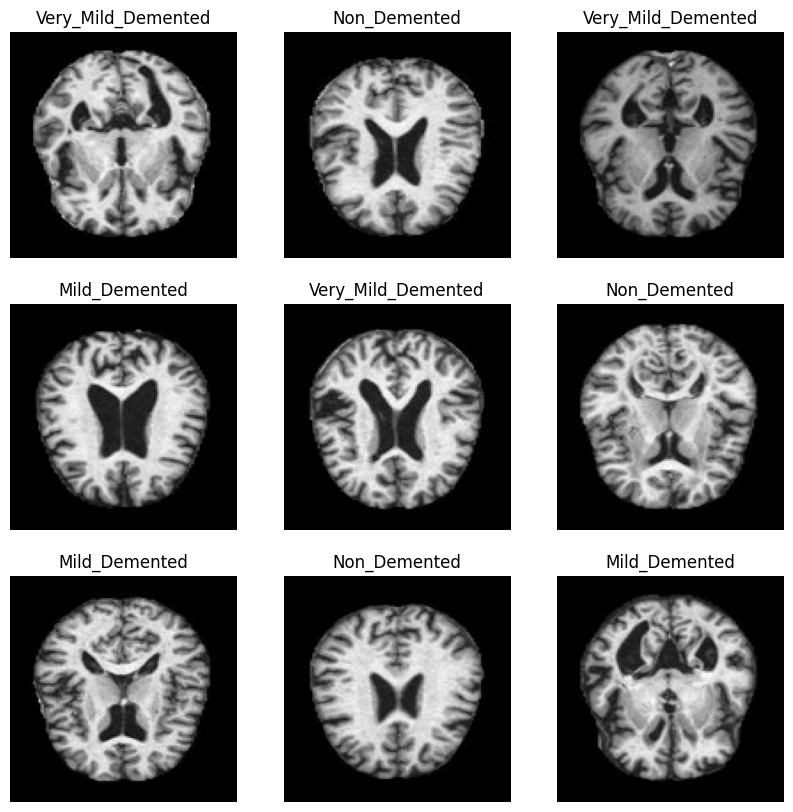

In [ ]:
# prompt: plot some of the augmented image

import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images from the training dataset
image_batch, label_batch = next(iter(train_ds))

# Display the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[np.argmax(label_batch[i])])
  plt.axis("off")

plt.show()


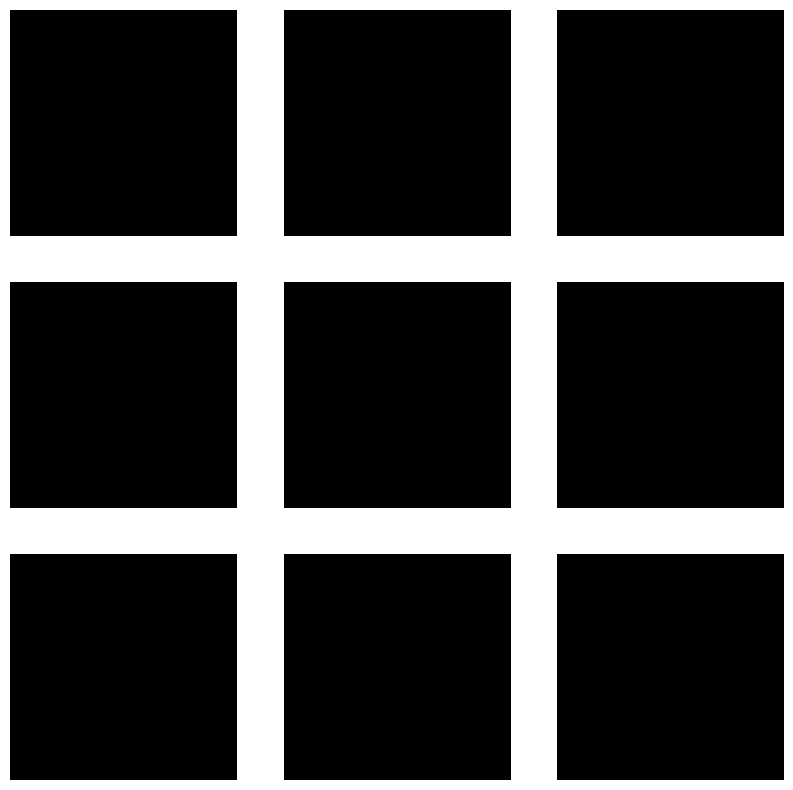

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Convert the dataset to numpy arrays
train_images = []
train_labels = []
for images, labels in train_ds:
    train_images.append(images.numpy())
    train_labels.append(labels.numpy())
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

# Create an iterator for the augmented images
augmented_images_iterator = datagen.flow(train_images, train_labels, batch_size=64)

# Plot a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image, _ = next(augmented_images_iterator)
    # Ensure that the pixel values are within the correct range
    augmented_image = augmented_image.astype("uint8")
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
plt.show()


In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=35, batch_size=64)

Epoch 1/35
71/71 [==============================] - 25s 185ms/step - loss: 1.0561 - accuracy: 0.4993 - precision: 0.5174 - recall: 0.2350 - f1_score: 0.3326 - val_loss: 1.0325 - val_accuracy: 0.4996 - val_precision: 0.5181 - val_recall: 0.4910 - val_f1_score: 0.3329
Epoch 2/35
71/71 [==============================] - 12s 174ms/step - loss: 1.0224 - accuracy: 0.5020 - precision: 0.5602 - recall: 0.2726 - f1_score: 0.3905 - val_loss: 0.9838 - val_accuracy: 0.5020 - val_precision: 0.5974 - val_recall: 0.3973 - val_f1_score: 0.3732
Epoch 3/35
43/71 [=================>............] - ETA: 6s - loss: 0.9901 - accuracy: 0.5185 - precision: 0.6201 - recall: 0.3245 - f1_score: 0.4526

KeyboardInterrupt: 

In [ ]:
# prompt: save model and reload it

# Save the model
model.save("/content/drive/MyDrive/modelLSTM.h5")

# Reload the model
loaded_model = keras.models.load_model("/content/drive/MyDrive/modelLSTM.h5")


In [ ]:
# prompt: test the loaded model result
loaded_model = keras.models.load_model("/content/drive/MyDrive/modelLSTM.h5")

# Evaluate the loaded model
loaded_model.evaluate(test_ds)


11/11 [==============================] - 5s 104ms/step - loss: 0.0684 - accuracy: 0.9782 - precision: 0.9798 - recall: 0.9782 - f1_score: 0.9783


[0.06841468065977097,
 0.9782270789146423,
 0.9797507524490356,
 0.9782270789146423,
 0.9783045649528503]

In [ ]:
!pip install scikit-plot

1/1 [==============================] - 1s 925ms/step
[[ 89   0   0   1]
 [  0   8   0   0]
 [  1   0 314   5]
 [  0   0   0 225]]


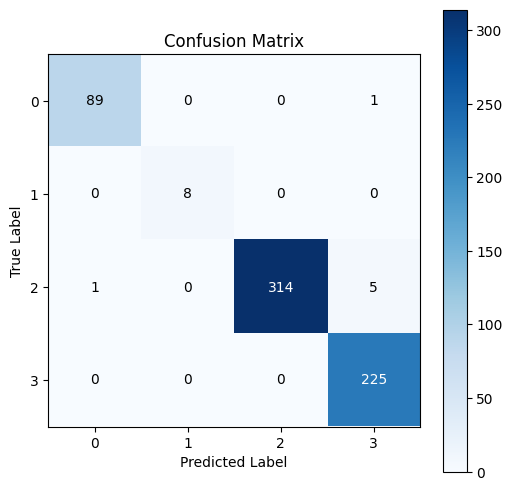

In [ ]:
# prompt: get confusion matrix
import scikitplot as skplt

import numpy as np
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = loaded_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels, axis=1))

confusion_matrix = confusion_matrix(y_true, y_pred)

print(confusion_matrix)
# Create a ConfusionMatrixDisplay object with appropriate classes
disp = skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6, 6))
# Customize and display the confusion matrix plot
disp.plot(cmap=plt.cm.Blues)  # Adjust colormap if desired
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model.save('my_model.keras')

In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

OSError: No file or directory found at my_model.keras

In [ ]:
np.save('my_history_CNN-LSTnewmodel.npy', history.history)

In [ ]:
results = model.evaluate(test_ds)

11/11 [==============================] - 2s 26ms/step - loss: 1.3777 - accuracy: 0.4977 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3307


In [ ]:
savedmetrics = np.load('my_history_CNN-LSTM.npy',allow_pickle=True)

Confusion matrix

In [ ]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

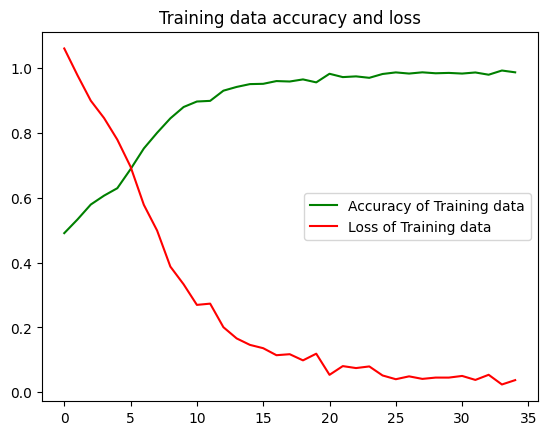

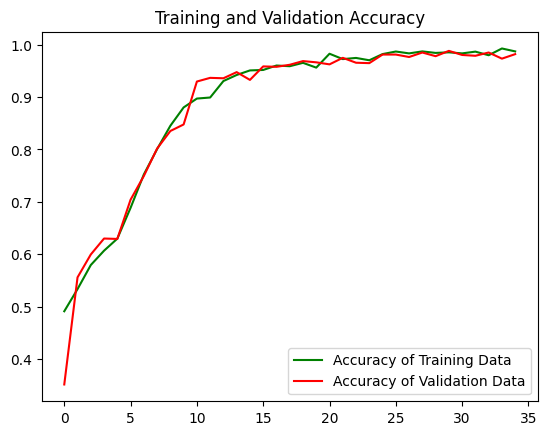

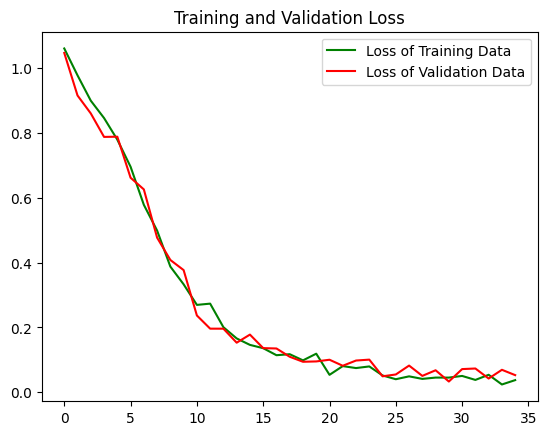

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

11/11 [==============================] - 1s 74ms/step
Matrice de confusion :
[[  9   3  50  28]
 [  2   0   3   3]
 [ 45   3 161 111]
 [ 33   3 107  82]]


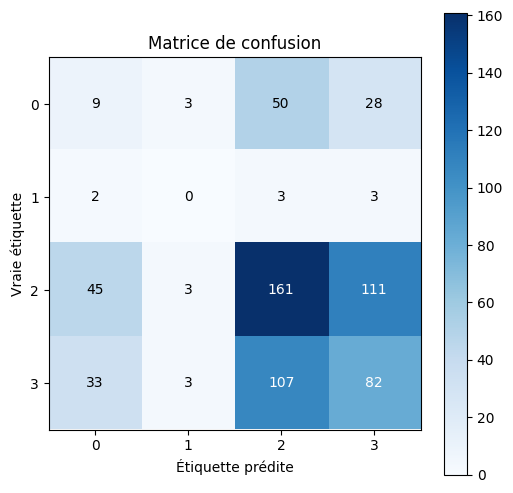

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import scikitplot as skplt

# Faire des prédictions sur l'ensemble de données de test
predictions = loaded_model.predict(test_ds)

# Extract true labels from test dataset
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in test_ds], axis=0)

# Convertir les prédictions en étiquettes de classe
y_pred = np.argmax(predictions, axis=1)

# Obtenir les étiquettes de classe uniques
labels = np.unique(np.concatenate([np.argmax(y, axis=1) for _, y in test_ds], axis=0))

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(cm)

# Afficher la matrice de confusion sous forme de graphique
disp = skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.xlabel('Étiquette prédite')
plt.ylabel('Vraie étiquette')
plt.show()